In [1]:
import pandas as pd

# Load datasets
static_data = pd.read_csv(r"datasets\static_client_data.csv")
historical_data = pd.read_csv(r"datasets\time_series_data.csv")
target_data = pd.read_csv(r"datasets\target_data.csv")

In [2]:
# Drop the 'month' column since it's not needed for averaging
historical_avg = historical_data.drop(columns=["month"]).groupby("client_id").mean().reset_index()

In [3]:
# Merge static data and averaged historical data
merged_data = static_data.merge(historical_avg, on="client_id", how="left")

# Merge with target data (only taking 'recommended_strategy')
merged_data = merged_data.merge(target_data[["client_id", "recommended_strategy"]], on="client_id", how="left")

# Check the final dataset
print(merged_data.head())

                              client_id  age gender employment_status  \
0  96c4c0a3-bb3f-4ac1-81ad-0850cd29911f   63  Other          Salaried   
1  35fb4c11-fb1a-4eeb-addc-bd6ff6cb7934   43   Male          Salaried   
2  e5aafbe0-c869-41d9-acf1-1b019363e449   56  Other          Salaried   
3  43b978dd-4dd5-4f21-96d2-63ab16c814a3   37  Other           Retired   
4  abe77866-df1b-4a5c-ad96-eb78dff4ffc9   42   Male     Self-Employed   

   annual_income  debt_to_income_ratio  financial_knowledge_score  \
0       61244.14                  0.49                          5   
1      111338.35                  0.39                          1   
2       27581.32                  0.12                          5   
3       64813.50                  0.44                          4   
4      108668.65                  0.35                          2   

      investment_goals risk_appetite  investment_horizon_years  ...  \
0           Retirement        Medium                         9  ...   
1   

In [54]:
# Define the path where you want to save the file
save_path = "datasets/merged_classificationavg_data.csv"

# Save the merged data as a CSV file
merged_data.to_csv(save_path, index=False)

print(f"File saved successfully at: {save_path}")

File saved successfully at: datasets/merged_classificationavg_data.csv


In [4]:
merged_data.isnull().sum()

client_id                      0
age                            0
gender                         0
employment_status              0
annual_income                  0
debt_to_income_ratio           0
financial_knowledge_score      0
investment_goals               0
risk_appetite                  0
investment_horizon_years       0
dependents                     0
preferred_asset_classes        0
savings_rate                   0
net_worth                      0
portfolio_value                0
equity_allocation_pct          0
fixed_income_allocation_pct    0
monthly_contribution           0
market_volatility_index        0
macroeconomic_score            0
sentiment_index                0
recommended_strategy           0
dtype: int64

In [5]:
merged_data.duplicated().sum()

np.int64(0)

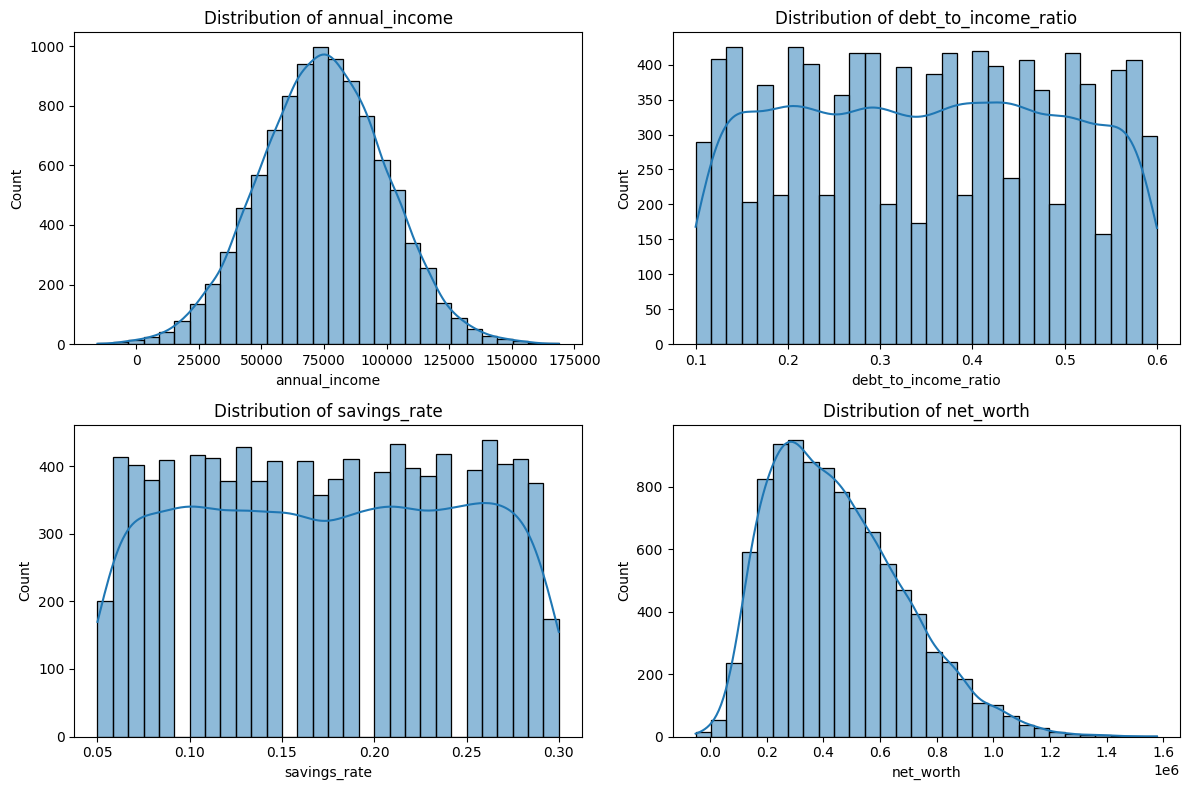

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of numerical features
num_cols = ["annual_income", "debt_to_income_ratio", "savings_rate", "net_worth"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

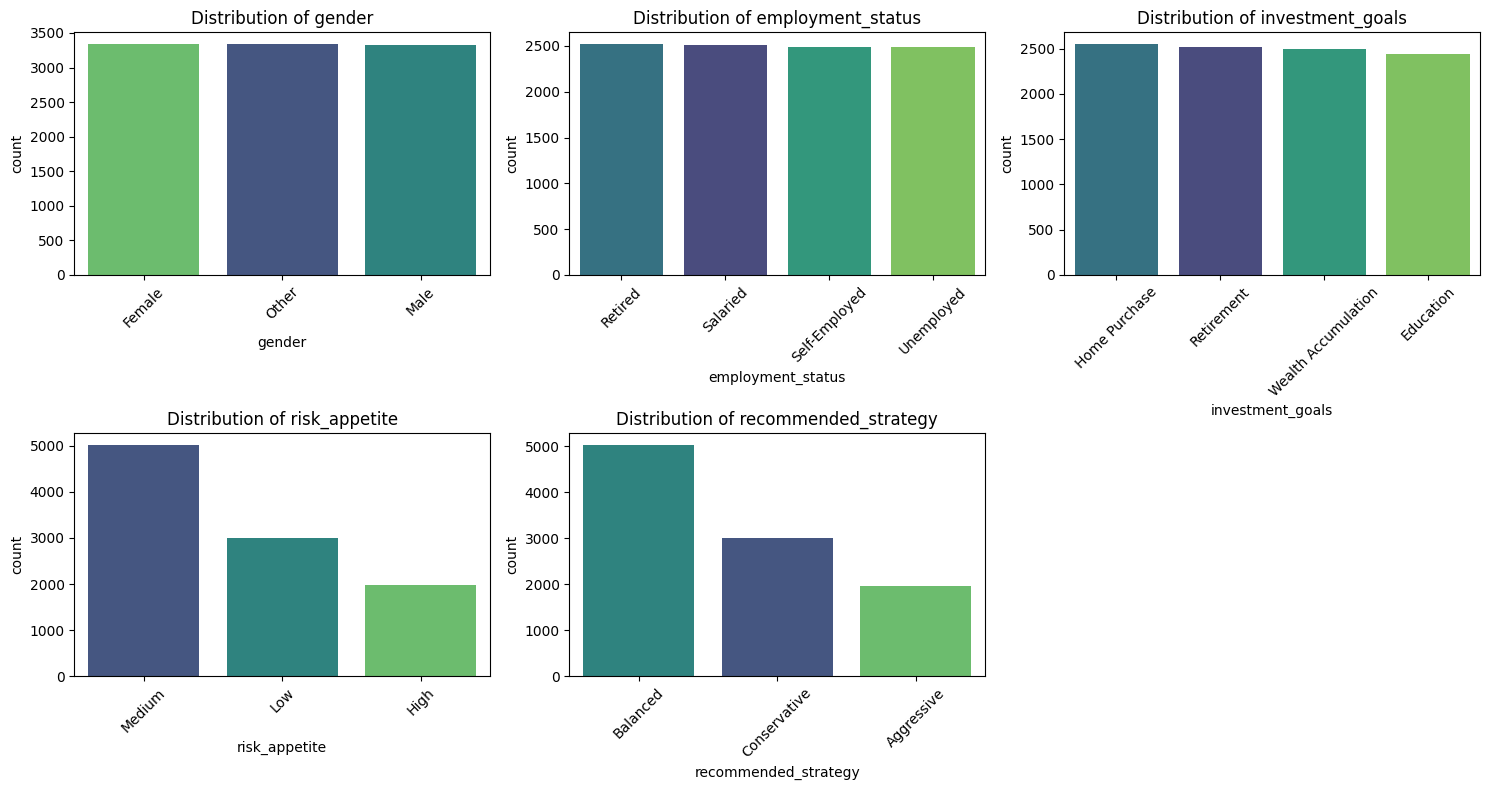

In [88]:
cat_cols = ["gender", "employment_status", "investment_goals", "risk_appetite", "recommended_strategy"]

plt.figure(figsize=(15, 8))

# Use a (2, 3) layout to accommodate all 5 plots
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)  # Change grid to (2, 3)
    sns.countplot(data=merged_data, x=col, order=merged_data[col].value_counts().index, hue=col, palette="viridis", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_32324\3900044556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data[col], palette="coolwarm")
C:\Users\DELL\AppData\Local\Temp\ipykernel_32324\3900044556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data[col], palette="coolwarm")
C:\Users\DELL\AppData\Local\Temp\ipykernel_32324\3900044556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data[col], palette="coolwarm")
C:\Users\DELL\AppData\Local\Temp\ipykernel_32324\3900044556.py:4: FutureWarning: 

Passing 

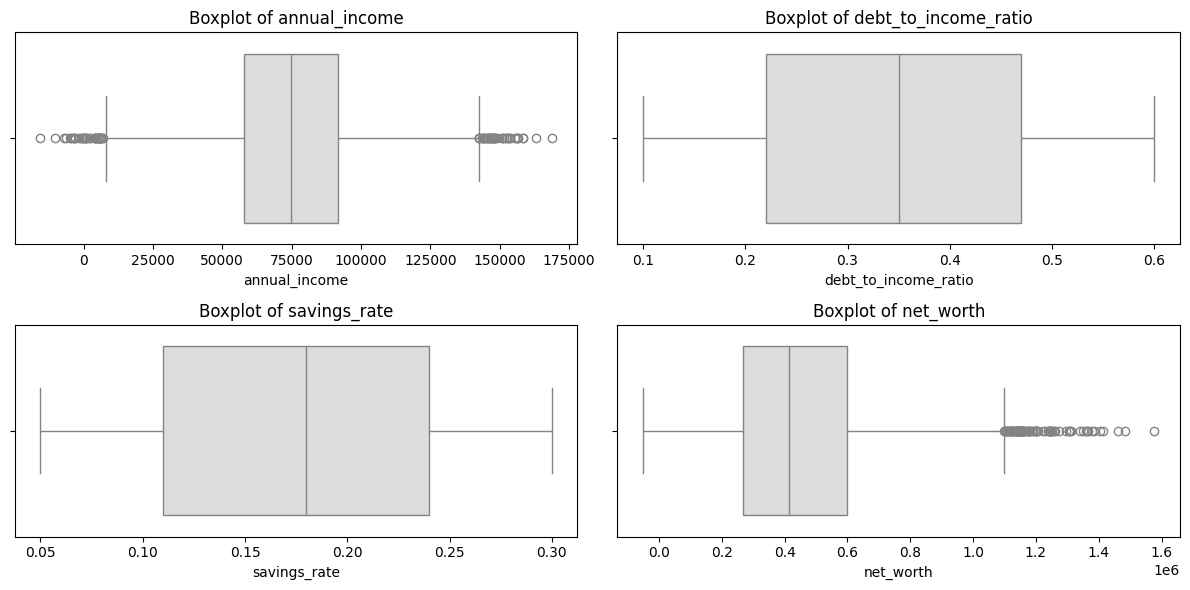

In [89]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=merged_data[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

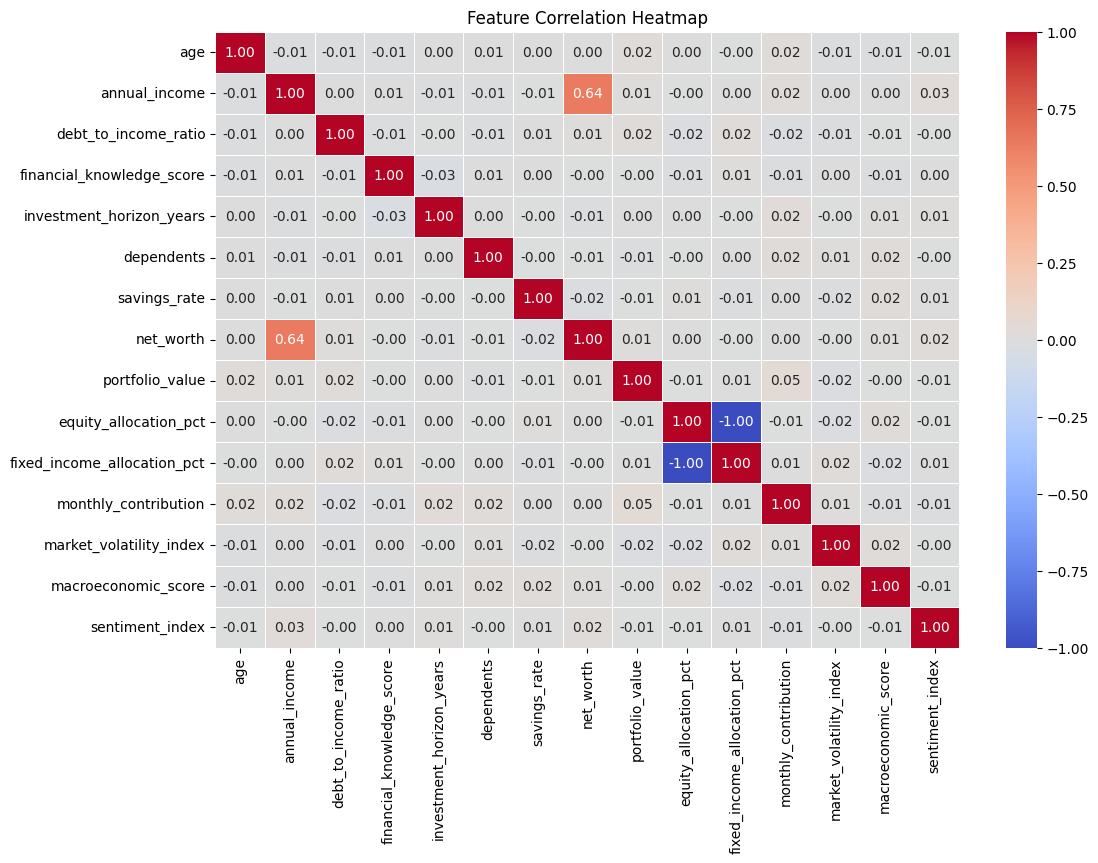

In [90]:
# Drop non-numeric columns (e.g., 'client_id', categorical variables already encoded)
numeric_data = merged_data.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
merged_data["income_to_networth_ratio"] = merged_data["annual_income"] / (merged_data["net_worth"] + 1e-6)
merged_data["adjusted_debt_to_income"] = merged_data["debt_to_income_ratio"] * merged_data["annual_income"]
merged_data["investment_savings_ratio"] = merged_data["portfolio_value"] / (merged_data["savings_rate"] + 1e-6)

In [7]:
merged_data["annual_income"] = merged_data["annual_income"].clip(lower=0)
merged_data["net_worth"] = merged_data["net_worth"].clip(lower=0)

In [8]:
import numpy as np

merged_data["age_group"] = pd.cut(
    merged_data["age"], bins=[18, 35, 55, np.inf], labels=["Young", "Mid-age", "Senior"], include_lowest=True
)

merged_data["income_group"] = pd.cut(
    merged_data["annual_income"], bins=[0, 50000, 150000, np.inf], labels=["Low", "Medium", "High"], include_lowest=True
)

merged_data["net_worth_level"] = pd.cut(
    merged_data["net_worth"], bins=[0, 50000, 200000, np.inf], labels=["Poor", "Stable", "Wealthy"], include_lowest=True
)

In [9]:
merged_data["total_financial_score"] = (
    merged_data["financial_knowledge_score"] + 
    merged_data["macroeconomic_score"] + 
    merged_data["sentiment_index"]
)
merged_data["total_allocation_pct"] = merged_data["equity_allocation_pct"] + merged_data["fixed_income_allocation_pct"]

In [10]:
merged_data.columns

Index(['client_id', 'age', 'gender', 'employment_status', 'annual_income',
       'debt_to_income_ratio', 'financial_knowledge_score', 'investment_goals',
       'risk_appetite', 'investment_horizon_years', 'dependents',
       'preferred_asset_classes', 'savings_rate', 'net_worth',
       'portfolio_value', 'equity_allocation_pct',
       'fixed_income_allocation_pct', 'monthly_contribution',
       'market_volatility_index', 'macroeconomic_score', 'sentiment_index',
       'recommended_strategy', 'income_to_networth_ratio',
       'adjusted_debt_to_income', 'investment_savings_ratio', 'age_group',
       'income_group', 'net_worth_level', 'total_financial_score',
       'total_allocation_pct'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

df_processed = merged_data.copy()

# Categorical feature lists
label_encode_cols = ["age_group", "income_group", "net_worth_level", "risk_appetite", "recommended_strategy"]  # Ordinal categorical
one_hot_encode_cols = ["investment_goals", "employment_status", "gender"]  # Nominal categorical
multi_label_cols = ["preferred_asset_classes"]  # Multi-label categorical

# Step 2: Label Encoding for Ordinal Categorical Features
encoders = {}
for col in label_encode_cols:
    encoder = LabelEncoder()
    df_processed[col + "_encoded"] = encoder.fit_transform(df_processed[col])
    df_processed.drop(columns=[col], inplace=True)  # Remove original column
    encoders[col] = encoder  # Store encoder for later use

# Step 3: One-Hot Encoding for Nominal Categorical Features
df_processed = pd.get_dummies(df_processed, columns=one_hot_encode_cols)

# Step 4: MultiLabel Binarization for Multi-Label Features
for col in multi_label_cols:
    df_processed[col] = df_processed[col].apply(eval)  # Convert string lists to real lists
    mlb = MultiLabelBinarizer()
    mlb_encoded = pd.DataFrame(mlb.fit_transform(df_processed[col]), columns=[col + "_" + c for c in mlb.classes_])
    
    df_processed = df_processed.join(mlb_encoded).drop(columns=[col])  # Drop original multi-label column

In [12]:
print(df_processed.columns)

Index(['client_id', 'age', 'annual_income', 'debt_to_income_ratio',
       'financial_knowledge_score', 'investment_horizon_years', 'dependents',
       'savings_rate', 'net_worth', 'portfolio_value', 'equity_allocation_pct',
       'fixed_income_allocation_pct', 'monthly_contribution',
       'market_volatility_index', 'macroeconomic_score', 'sentiment_index',
       'income_to_networth_ratio', 'adjusted_debt_to_income',
       'investment_savings_ratio', 'total_financial_score',
       'total_allocation_pct', 'age_group_encoded', 'income_group_encoded',
       'net_worth_level_encoded', 'risk_appetite_encoded',
       'recommended_strategy_encoded', 'investment_goals_Education',
       'investment_goals_Home Purchase', 'investment_goals_Retirement',
       'investment_goals_Wealth Accumulation', 'employment_status_Retired',
       'employment_status_Salaried', 'employment_status_Self-Employed',
       'employment_status_Unemployed', 'gender_Female', 'gender_Male',
       'gender_Othe

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

y = df_processed["recommended_strategy_encoded"]  # Target variable
X = df_processed.drop(columns=["client_id", "recommended_strategy", "recommended_strategy_encoded"], errors="ignore")

# Step 6: Standard Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [22]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import numpy as np

# Ensure reproducibility
np.random.seed(65)  # Set a fixed random seed

# Apply Mutual Information for feature selection
mi_selector = SelectKBest(score_func=mutual_info_classif, k=10)  # Select top 10 features
X_selected = mi_selector.fit_transform(X_scaled_df, y)

# Get selected feature names
selected_features = X_scaled_df.columns[mi_selector.get_support()]
print("Selected Features using Mutual Information:", selected_features)

# Create final DataFrame with only selected features
X_final_df = pd.DataFrame(X_selected, columns=selected_features)

Selected Features using Mutual Information: Index(['annual_income', 'equity_allocation_pct', 'fixed_income_allocation_pct',
       'monthly_contribution', 'income_group_encoded', 'risk_appetite_encoded',
       'employment_status_Self-Employed', 'gender_Male',
       'preferred_asset_classes_Mutual Funds',
       'preferred_asset_classes_Stocks'],
      dtype='object')


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into Training and Testing Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final_df, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5040

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.50      1.00      0.67      1006
           2       0.33      0.00      0.01       601

    accuracy                           0.50      2000
   macro avg       0.28      0.33      0.23      2000
weighted avg       0.35      0.50      0.34      2000



In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

best_xgb = XGBClassifier(
    learning_rate=0.01, 
    max_depth=3, 
    n_estimators=200, 
    use_label_encoder=False, 
    eval_metric="mlogloss", 
    random_state=42
)

# Train the model
best_xgb.fit(X_train, y_train)

# Predictions on Test Set
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate Model Performance
print("Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:05:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final XGBoost Accuracy: 0.502

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       393
           1       0.50      1.00      0.67      1006
           2       0.25      0.00      0.00       601

    accuracy                           0.50      2000
   macro avg       0.25      0.33      0.22      2000
weighted avg       0.33      0.50      0.34      2000


Confusion Matrix:
 [[   0  393    0]
 [   0 1003    3]
 [   0  600    1]]


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [30]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, solver='saga')

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('lr', lr_model)],
    voting='soft'  # 'hard' for majority voting, 'soft' for probability averaging
)

# Train and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Ensemble Accuracy: 0.5015
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.00      0.01       393
           1       0.51      0.97      0.67      1006
           2       0.35      0.04      0.08       601

    accuracy                           0.50      2000
   macro avg       0.35      0.34      0.25      2000
weighted avg       0.40      0.50      0.36      2000

Confusion Matrix:
 [[  1 369  23]
 [  3 975  28]
 [  1 573  27]]


In [26]:
# Voting Classifier (Ensemble of Best Models)
print("\nTraining Voting Classifier")
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"))
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, y_pred_voting)

print(f"\nVoting Classifier Accuracy: {voting_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))


Training Voting Classifier


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:06:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Voting Classifier Accuracy: 0.4730
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.04      0.06       393
           1       0.51      0.83      0.63      1006
           2       0.32      0.16      0.22       601

    accuracy                           0.47      2000
   macro avg       0.35      0.34      0.30      2000
weighted avg       0.40      0.47      0.40      2000

Confusion Matrix:
 [[ 14 310  69]
 [ 32 833 141]
 [ 19 483  99]]


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC  # Can use XGBoost as well

# Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, solver='saga')

# Define stacking model with SVC as meta-classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_model), ('lr', lr_model)],
    final_estimator=SVC(probability=True)  # Meta-model (can use LogisticRegression/XGBoost)
)

# Train and evaluate
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")


Stacking Ensemble Accuracy: 0.5030


In [29]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Model Accuracy: 0.5030


In [169]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import numpy as np

# Ensure reproducibility
np.random.seed(40)  # Set a fixed random seed

# Apply Mutual Information for feature selection
mi_selector = SelectKBest(score_func=mutual_info_classif, k=10)  # Select top 10 features
X_selected = mi_selector.fit_transform(X_scaled_df, y)

# Get selected feature names
selected_features = X_scaled_df.columns[mi_selector.get_support()]
print("Selected Features using Mutual Information:", selected_features)

Selected Features using Mutual Information: Index(['annual_income', 'equity_allocation_pct', 'fixed_income_allocation_pct',
       'monthly_contribution', 'market_volatility_index', 'age_group_encoded',
       'income_group_encoded', 'risk_appetite_encoded',
       'investment_goals_Home Purchase',
       'preferred_asset_classes_Real Estate'],
      dtype='object')
